In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace import sarimax
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AirPassengers.csv')
df1 = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.shape

(144, 2)

In [5]:
df.columns = ['time','passengers']
df1.columns = ['time','passengers']

In [6]:
df.head()

,time,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.dtypes

time          object
passengers     int64
dtype: object

In [8]:
df['time'] = pd.to_datetime(df['time'])
df1['time'] = pd.to_datetime(df1['time'])

In [9]:
df.dtypes

time          datetime64[ns]
passengers             int64
dtype: object

In [10]:
df.head()

,time,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
df['time'].unique()

array(['1949-01-01T00:00:00.000000000', '1949-02-01T00:00:00.000000000',
       '1949-03-01T00:00:00.000000000', '1949-04-01T00:00:00.000000000',
       '1949-05-01T00:00:00.000000000', '1949-06-01T00:00:00.000000000',
       '1949-07-01T00:00:00.000000000', '1949-08-01T00:00:00.000000000',
       '1949-09-01T00:00:00.000000000', '1949-10-01T00:00:00.000000000',
       '1949-11-01T00:00:00.000000000', '1949-12-01T00:00:00.000000000',
       '1950-01-01T00:00:00.000000000', '1950-02-01T00:00:00.000000000',
       '1950-03-01T00:00:00.000000000', '1950-04-01T00:00:00.000000000',
       '1950-05-01T00:00:00.000000000', '1950-06-01T00:00:00.000000000',
       '1950-07-01T00:00:00.000000000', '1950-08-01T00:00:00.000000000',
       '1950-09-01T00:00:00.000000000', '1950-10-01T00:00:00.000000000',
       '1950-11-01T00:00:00.000000000', '1950-12-01T00:00:00.000000000',
       '1951-01-01T00:00:00.000000000', '1951-02-01T00:00:00.000000000',
       '1951-03-01T00:00:00.000000000', '1951-04-01

In [12]:
df.set_index('time',inplace=True)
df1.set_index('time',inplace=True)

In [13]:
df.head()

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
df.shape

(144, 1)

## Checking if data is stationary or non-stationary

<AxesSubplot:xlabel='time'>

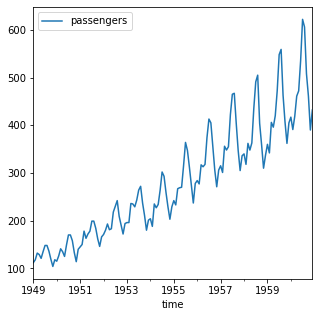

In [15]:
df.plot(figsize=(5,5))

In [16]:
df['passengers'] = np.log(df['passengers'])

<AxesSubplot:xlabel='time'>

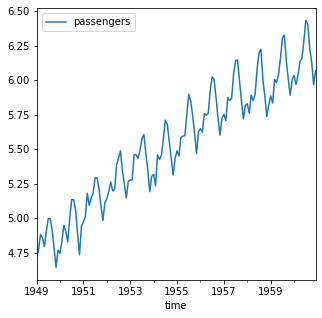

In [17]:
df.plot(figsize=(5,5))

### Performing AD Fuller test to find if data is stationary or non-stationary

In [18]:
adf = adfuller(df['passengers'])

In [19]:
adf

(-1.7170170891069625,
 0.4223667747703904,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

#### Analysis:
    Since the pvalue is greater than 0.05 we accept the null hypothesis i.e. data is non-stationary

## Using the first difference to make the data stationary

In [20]:
df['first_difference'] = df['passengers'].diff()

In [21]:
adf = adfuller(df['first_difference'].dropna())

In [22]:
adf

(-2.7171305983881595,
 0.07112054815085424,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

#### Analysis:
    As the pvalue is still greater than 0.05 we accept the null hypothesis i.e. data is non-stationary

<AxesSubplot:xlabel='time'>

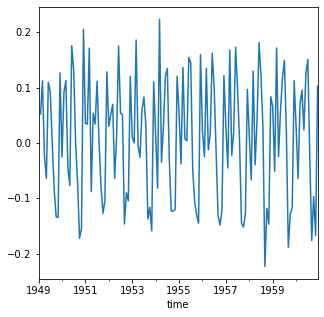

In [23]:
df['first_difference'].plot(figsize=(5,5))

In [24]:
df['second_difference'] = df['passengers'].diff().diff()

In [25]:
adf = adfuller(df['second_difference'].dropna())

In [26]:
adf

(-8.196629132182144,
 7.419304549380349e-13,
 13,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -430.89362828642743)

#### Analysis:
    As the pvalue is lesser than 0.05 we reject the null hypothesis i.e. data is stationary

#### Conclusion:
    The time series is now stationary

## ACF plot

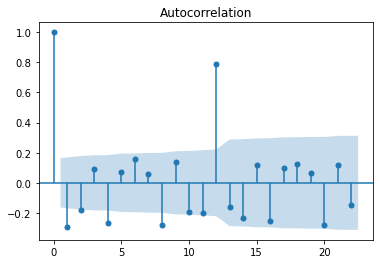

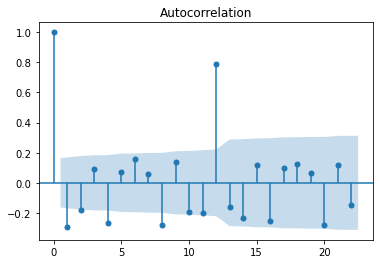

In [27]:
plot_acf(df['second_difference'].dropna())

In [28]:
#The q value is 1 or 2

## PACF plot

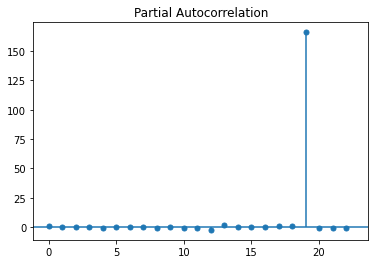

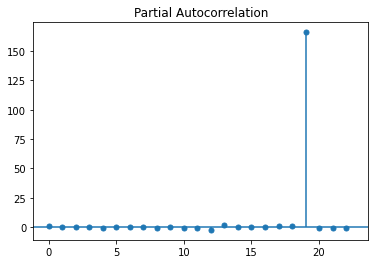

In [29]:
plot_pacf(df['second_difference'].dropna())

In [30]:
# p value is 1

### Analysis:
    From the above analysis we conclude that the p,q and d values are 1,1 or 2,2

## Fitting ARIMA

In [31]:
model_arima = ARIMA(df['passengers'],order=(0,2,2))

In [32]:
arima = model_arima.fit()

In [33]:
df['forecast'] = arima.predict(start=120,end=144,dynamic=True)

<AxesSubplot:xlabel='time'>

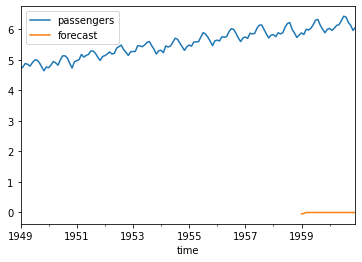

In [34]:
df[['passengers','forecast']].plot()

In [35]:
r2_score(df['passengers'][120:144],df['forecast'][120:144])

-1473.427039840981

## Implementing sarimax

In [36]:
model_sarima = sarimax.SARIMAX(df['passengers'],order=(1,2,2),seasonal_order = (1,2,2,12))

In [37]:
sarima = model_sarima.fit()

In [38]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         passengers   No. Observations:                  144
Model:             SARIMAX(1, 2, 2)x(1, 2, 2, 12)   Log Likelihood                 197.501
Date:                            Mon, 13 Jun 2022   AIC                           -381.001
Time:                                    14:14:33   BIC                           -361.606
Sample:                                01-01-1949   HQIC                          -373.126
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0102      0.211      0.048      0.961      -0.404       0.425
ma.L1         -1.4623      0.270     -5.408      0.000      -1.992      -0.932
ma.L2          0.4693      0.180      2.601      0.009       0.116       0.823
ar.S.L12       0.0024      0.218      0.011      0.991      -0.425       0.429
ma.S.L12      -1.9122     19.433     -0.098      0.922     -39.999      36.175
ma.S.L24       0.9239     17.806      0.052      0.959     -33.975      35.823
sigma2         0.0010      0.019      0.051      0.959      -0.037       0.039
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.98   Prob(JB):                         0.62
Heteroskedasticity (H):               0.59   Skew:                             0.22
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
df['sarima_forecast'] = sarima.predict(start=114,end=144,dynamic=True)

<AxesSubplot:xlabel='time'>

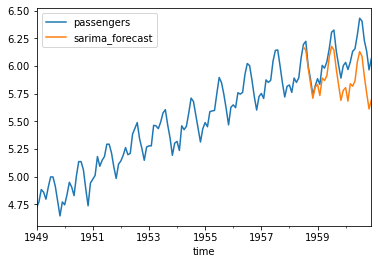

In [40]:
df[['passengers','sarima_forecast']].plot()

In [41]:
r2_score(df['passengers'][120:144],df['sarima_forecast'][120:144])

-1.276383988893452

In [42]:
mean_squared_error(df['passengers'][120:144],df['sarima_forecast'][120:144])

0.057573905165781085

In [43]:
model=auto_arima(df['passengers'][:120],start_p=0,d=1,start_q=0,max_p=3,max_d=3,max_q=3, start_P=0,D=1, start_Q=0, max_P=5,max_D=5,
                 max_Q=5, m=12, seasonal=True,error_action='warn',trace=True,supress_warnings=True,stepwise=True,
                 random_state=50,n_fits=50,test='adf')

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-353.412, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-383.359, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-389.010, Time=0.70 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-364.326, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-387.220, Time=1.03 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-387.254, Time=1.49 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-384.232, Time=0.51 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.35 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-379.989, Time=0.56 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-387.279, Time=1.42 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-387.065, Time=1.07 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-388.643, Time=0.53 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-385.329, Time=1.47 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=-387.202, Time=0.81 sec

Best model:  ARIMA(0,1,

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 197.505
Date:                            Mon, 13 Jun 2022   AIC                           -389.010
Time:                                    14:14:47   BIC                           -380.991
Sample:                                         0   HQIC                          -385.759
                                            - 120                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3425      0.087     -3.921      0.000      -0.514      -0.171
ma.S.L12      -0.5404      0.105     -5.152      0.000      -0.746      -0.335
sigma2         0.0014      0.000      7.861      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.92   Prob(JB):                         0.62
Heteroskedasticity (H):               0.37   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
model_sarima = sarimax.SARIMAX(df['passengers'],order=(0,1,1),seasonal_order = (0,1,1,12))

In [46]:
sarima = model_sarima.fit()

In [47]:
df['sarima_forecast'] = sarima.predict(start=119,end=144,dynamic=True)

<AxesSubplot:xlabel='time'>

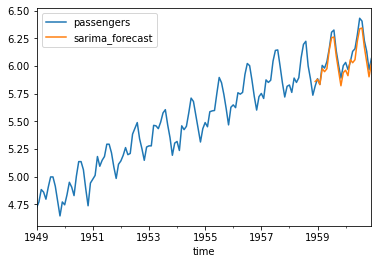

In [48]:
df[['passengers','sarima_forecast']].plot()

In [49]:
r2_score(df['passengers'][119:144],df['sarima_forecast'][119:144])

0.8662484893909386

In [50]:
mean_squared_error(df['passengers'][119:144],df['sarima_forecast'][119:144])

0.0036536570961396004

In [52]:
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [53]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00')]

In [55]:
new_df = pd.DataFrame(index= future_dates[1:],columns=df.columns)

In [56]:
forecast_df = pd.concat([df,new_df])

In [58]:
forecast_df['sarima_forecast'] = sarima.predict(start=140,end=160,dynamic=True)

<AxesSubplot:>

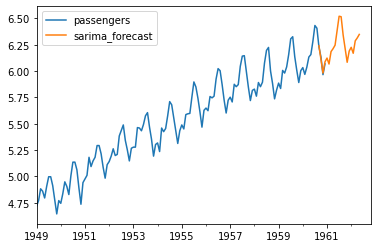

In [59]:
forecast_df[['passengers','sarima_forecast']].plot()

In [64]:
forecast_df = np.exp(forecast_df)

<AxesSubplot:>

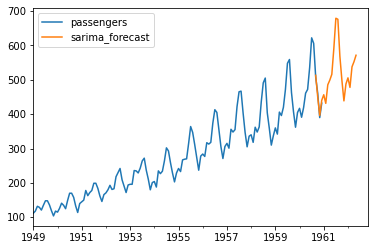

In [65]:
forecast_df[['passengers','sarima_forecast']].plot()